# Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# Neural Networks - Image Recognition 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

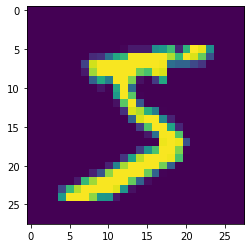

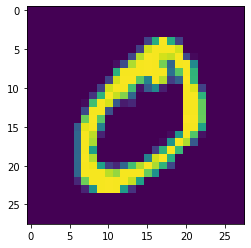

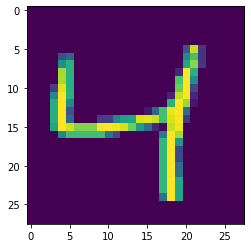

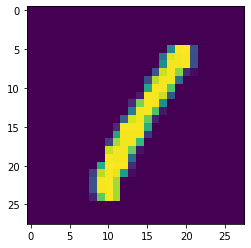

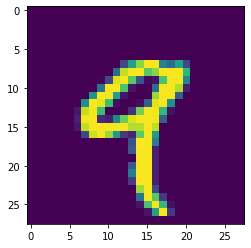

<Figure size 432x288 with 0 Axes>

In [3]:
images = [-1, 0, 1, 2, 3, 4]
for i in images:
    plt.imshow(x_train[i])
    plt.figure(i + 1)

In [4]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])
print(y_train[4])

5
0
4
1
9


1) Add random noise (see below on size parameter on np.random.normal) to the images in training and testing. *Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the size parameter should match the data. *



In [5]:
x_train_noise = x_train + np.random.normal(scale = 50, size = x_train.shape)
# Setting scale to 50 appears to "mildly to heavily" distort the image

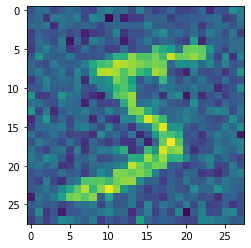

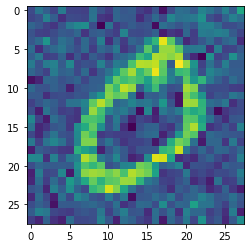

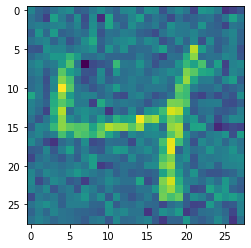

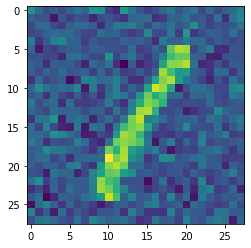

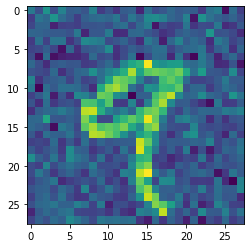

<Figure size 432x288 with 0 Axes>

In [6]:
images = [-1, 0, 1, 2, 3, 4]
for i in images:
    plt.imshow(x_train_noise[i])
    plt.figure(i + 1)

In [7]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])
print(y_train[4])

5
0
4
1
9


2) Compare the `accuracy` of train and val after N epochs for MLNN with and without noise.

In [8]:
# Add noise, confirm the distortions are "mild to heavy" and without noise = 0.0
x_train_noise = x_train + np.random.normal(scale = 0.7, size = x_train.shape)
print("Image 1 with noise:", x_train_noise[0, :5])
print("Image 1 without noise:", x_train[0, :5])
print("Image 2 with noise:", x_train_noise[1, :5])
print("Image 2 without noise:",x_train[1, :5])
print("Image 3 with noise:", x_train_noise[2, :5])
print("Image 3 without noise:", x_train[2, :5])
print("Image 4 with noise:", x_train_noise[3, :5])
print("Image 4 without noise:", x_train[3, :5])
print("Image 5 with noise:", x_train_noise[4, :5])
print("Image 5 without noise:", x_train[5, :5])

Image 1 with noise: [[ 4.02990723e-01 -1.66067833e-01  2.52118081e+00 -7.27909416e-01
  -1.96049126e-01 -4.53223196e-01  8.50211592e-01  4.66264095e-01
   1.08226395e+00  3.55619993e-02 -4.36001815e-01 -3.53872836e-01
  -1.16414976e-01 -5.83488831e-01  1.02952832e+00  2.36758358e-01
   8.88835505e-01  7.76008503e-01 -6.75485833e-01  5.34135525e-01
   1.22284799e+00  4.27918385e-01 -7.63332916e-02 -1.11001851e+00
   1.17929472e+00 -2.72455821e-01 -1.72558695e-01 -6.53434892e-01]
 [ 3.20525441e-01 -8.73713254e-01 -5.21800811e-01  1.80333793e-01
  -6.32499340e-01 -1.39033445e-01 -3.27544118e-02 -6.32938557e-01
  -4.71031962e-01  2.64863158e-01 -1.03348204e+00  3.52341160e-01
   3.27982390e-03 -6.88666229e-01  1.05996001e+00  1.31476109e+00
  -8.76114065e-01  1.11190925e+00 -2.20775148e-02  3.93671622e-01
  -6.05178424e-01 -2.88071501e-01 -1.07616562e+00 -1.33598573e+00
  -1.34462656e-01  3.41339059e-01 -4.75898050e-01 -2.30290203e-01]
 [ 4.37225085e-01 -6.57974203e-01 -6.72447194e-01  3.0

In [23]:
# Reshape
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


3) Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

In [24]:
scales = [0]
train_acc = []
test_acc = []

batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

for scale in scales:
    x_train_noise = x_train + np.random.normal(scale = scale, size = x_train.shape)
    x_test_noise = x_test + np.random.normal(scale = scale, size = x_test.shape)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = model.fit(x_train_noise, y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (x_test_noise, y_test))
    score = model.evaluate(x_test_noise, y_test, verbose=0)
    
    train_acc.append(history.history['accuracy'][-1])
    test_acc.append(score[1])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               401920    
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               262656    
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
  1/469 [............................

2022-04-18 10:43:08.388256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


467/469 [============================>.] - ETA: 0s - loss: 0.2471 - accuracy: 0.9232

2022-04-18 10:43:12.869256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 0.2467 - accuracy: 0.9233 - val_loss: 0.1204 - val_accuracy: 0.9614
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1025 - accuracy: 0.9683 - val_loss: 0.1035 - val_accuracy: 0.9681
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0738 - accuracy: 0.9781 - val_loss: 0.0813 - val_accuracy: 0.9766
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0581 - accuracy: 0.9826 - val_loss: 0.0676 - val_accuracy: 0.9813
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0491 - accuracy: 0.9853 - val_loss: 0.0917 - val_accuracy: 0.9764
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0410 - accuracy: 0.9881 - val_loss: 0.0830 - val_accuracy: 0.9804
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0374 - accuracy: 0.9893 - val_loss: 0.0816 - val_accuracy: 0.9815
Epoch 8/20

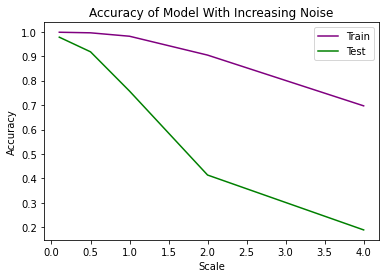

In [19]:
plt.figure()
plt.plot(scales, train_acc, label = 'Train', c = "purple")
plt.plot(scales, test_acc, label = 'Test', c = "green")
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('Accuracy of Model With Increasing Noise')
plt.legend()
plt.show()

As evidenced above the accuracy of the model decreases steadily as the noise increases, which makes sense. 

In [20]:
train_acc

[0.9980166554450989,
 0.9956666827201843,
 0.9816666841506958,
 0.9045000076293945,
 0.6969166994094849]

In [21]:
test_acc

[0.9778000712394714,
 0.9180000424385071,
 0.7573000192642212,
 0.4139000177383423,
 0.18940000236034393]